In [11]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing
filename = ("housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filename, delim_whitespace=True, names=names)
df = df.drop(['CRIM','ZN','INDUS','NOX','AGE','DIS','RAD', 'CHAS','PTRATIO','TAX','B'], axis = 1)
df.head(5)


,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [12]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset = pd.DataFrame(x_scaled)
dataset.head(5)

,0,1,2
0,0.577505,0.089680,0.422222
1,0.547998,0.204470,0.368889
2,0.694386,0.063466,0.660000
3,0.658555,0.033389,0.631111
4,0.687105,0.099338,0.693333


In [19]:
x1 = dataset[0].values
x2 = dataset[1].values
Y= dataset[2].values


In [20]:
m = len(x1)
x0 = np.ones(m)
#we assume x0 to be 1 
X = np.array([x0, x1, x2]).T
#.T is used to obtain transpose 
# Initial Coefficients of B is assumed to be 0 
#our eqn will be in form of b0 + b1*x1 +b2*x2
B = np.zeros(3)
Y = np.array(Y)
alpha = 0.0001
#alpha is learning rate

In [21]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [22]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)


0.09674539598887426


In [23]:
def grad_desc(X, Y, B, a, iteration):
    cost_iter = [0] * iteration
    #is used to obtain a plot of how gradient descent works 
    m = len(Y)
    
    for i in range(iteration):
        # value obtained from hypothesis
        h = X.dot(B)
        # Difference between Hypothesis and Actual Y
        #note that los is calculate for all values so we divide it by m to obtain average loss
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - a * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_iter[i] = cost
        
    return B, cost_iter

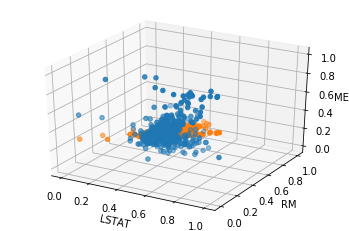

<Figure size 36000x28800 with 0 Axes>

In [34]:
newB, cost_history = grad_desc(X, Y, B, alpha, 200000)
Ypred=X.dot(newB)
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(x1,x2,Y)
threedee.scatter(x1,x2,Ypred)
threedee.set_xlabel('LSTAT')
threedee.set_ylabel('RM')
threedee.set_zlabel('MEDV')
plt.figure(figsize=(500,400)) 
plt.show()

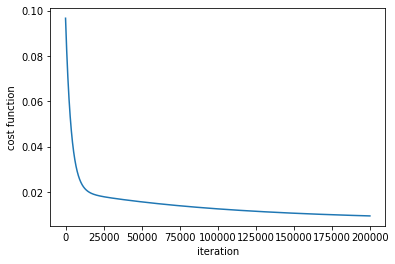

In [35]:
x=np.arange(1,200001)
plt.plot(x, cost_history)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.show()

In [36]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse
print(rmse(Y,Ypred))

0.13792397378831248
